### Import configuration and data.

In [2]:
%load_ext autoreload
%autoreload 2

from trainer import *

trainer = load_trainer(path='../output/SNL_MSU_DOE_static/base_SNL_MSU_DOE_static/trainer.pkl')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gaussian process-based Bayes hyperparameter optimization (Optional)

### Training

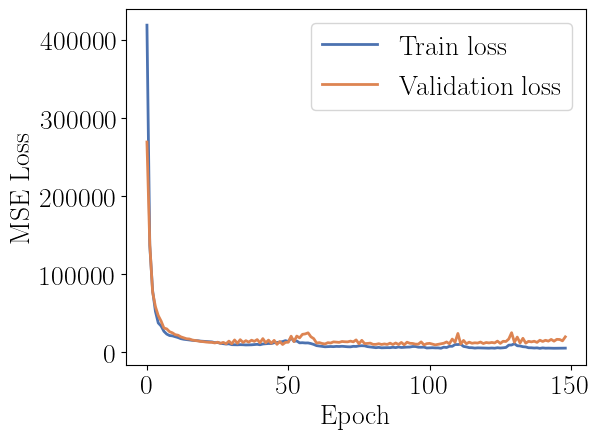

In [3]:
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 4588.8066, R2: 0.9771
Validation Loss: 9605.0400, R2: 0.9638
Test Loss: 12688.0820, R2: 0.9469


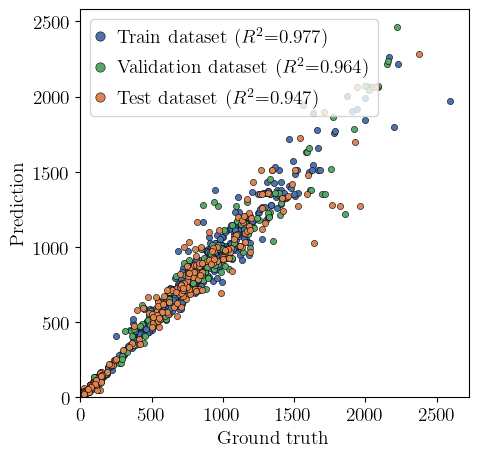

In [21]:
trainer.plot_truth_pred(log_trans=False)

### Permutation feature importance

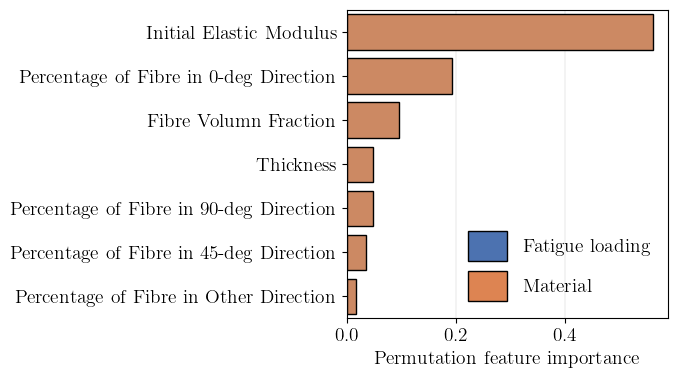

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Thickness
Calculate PDP:  Initial Elastic Modulus


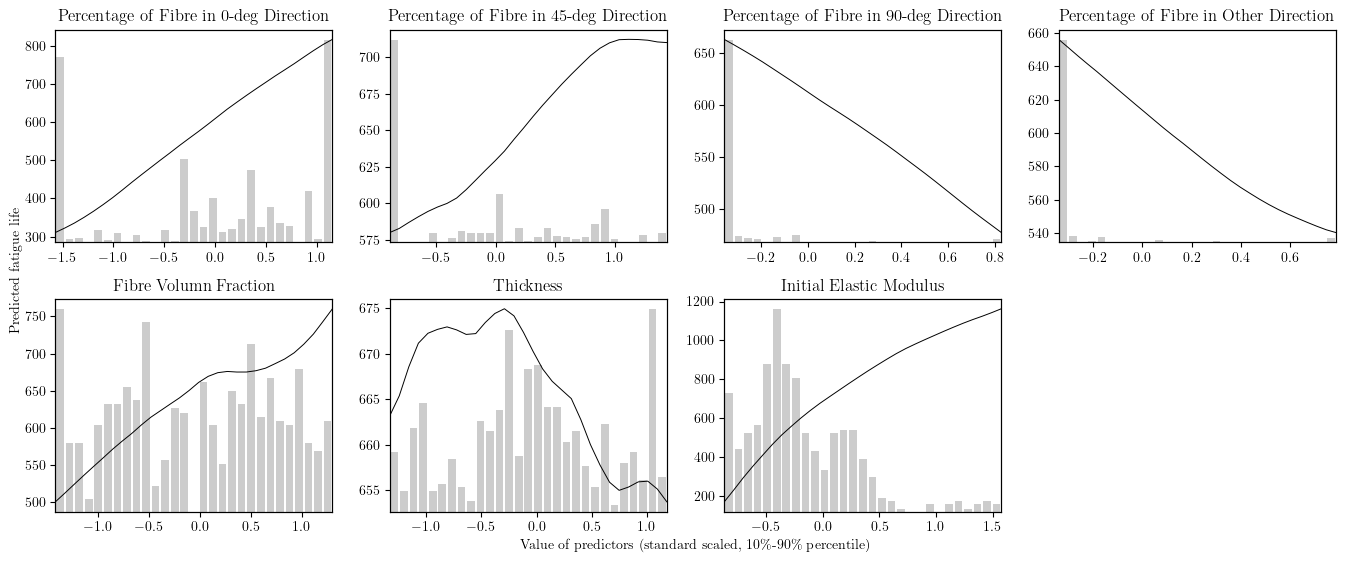

In [10]:
trainer.plot_partial_dependence(log_trans=False)

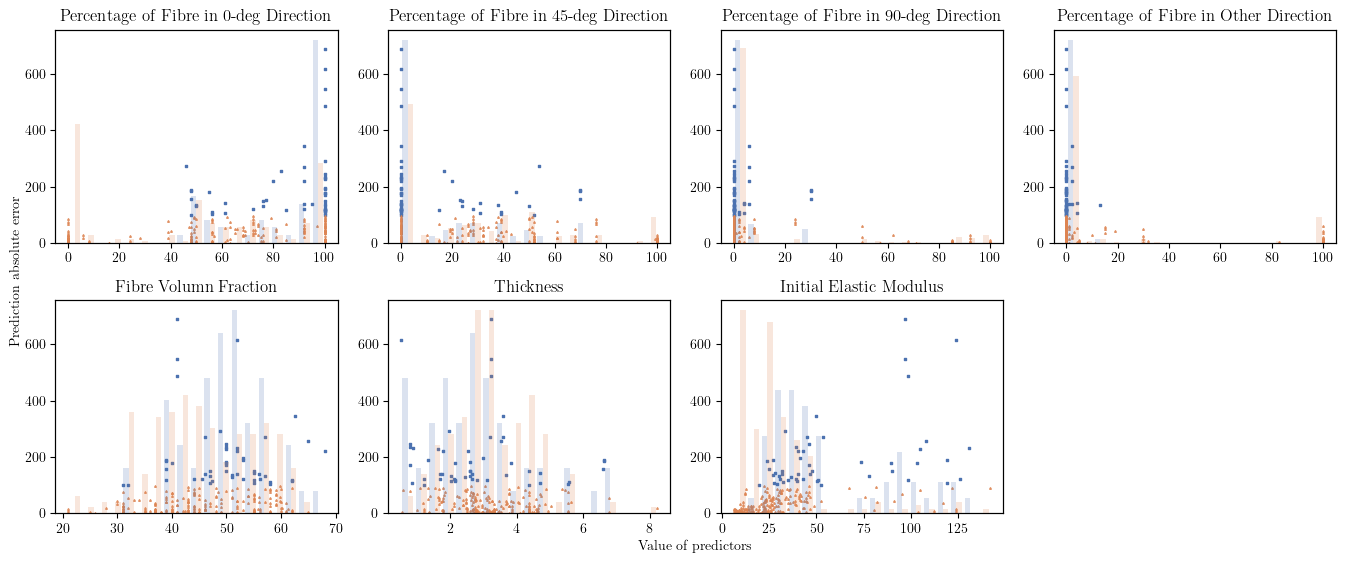

In [12]:
trainer.plot_partial_err(thres=100)

## Baseline models

In [13]:
trainer.get_leaderboard(test_data_only=False)

AutoGluon metrics
This work metrics


,Program,Model,Train RMSE,Train MSE,Train MAE,Train MAPE,Train R2,Test RMSE,Test MSE,Test MAE,Test MAPE,Test R2,Validation RMSE,Validation MSE,Validation MAE,Validation MAPE,Validation R2
0,This work,--,67.740738,4588.807129,41.084007,0.078570,0.977081,112.641388,12688.083008,64.801598,0.116508,0.946916,98.005302,9605.040039,57.405334,0.109388,0.963801
1,AutoGluon,CatBoost_BAG_L1/T0,96.391012,9291.227125,56.325801,0.367162,0.953594,202.399961,40965.744320,96.858117,0.439359,0.828609,191.183874,36551.273584,102.150497,0.810937,0.862249
2,AutoGluon,LightGBMXT_BAG_L1/T0,92.215155,8503.634792,46.859730,0.341768,0.957528,218.596829,47784.573865,86.493521,0.369671,0.800081,190.180947,36168.792617,90.390358,0.692727,0.863690
3,AutoGluon,RandomForestMSE_BAG_L1/T0,72.398053,5241.478039,32.608839,0.223808,0.973821,219.144145,48024.156417,86.209506,0.280268,0.799078,179.757320,32312.694113,97.270500,0.774430,0.878223
4,AutoGluon,WeightedEnsemble_L2,73.268625,5368.291448,33.075552,0.245269,0.973188,221.383446,49010.630217,87.387399,0.359920,0.794951,163.370344,26689.869181,87.125060,0.766834,0.899414
5,AutoGluon,ExtraTreesMSE_BAG_L1/T0,71.456404,5106.017607,31.541281,0.220132,0.974498,223.690856,50037.599167,89.761905,0.359364,0.790655,165.467891,27379.622936,89.241098,0.785067,0.896814
6,AutoGluon,LightGBMLarge_BAG_L1,87.912796,7728.659784,42.767378,0.339607,0.961398,224.651771,50468.418260,86.536848,0.379049,0.788852,184.052645,33875.376139,89.249898,0.727512,0.872333
7,AutoGluon,NeuralNetFastAI_BAG_L1/T0,134.571928,18109.603889,79.851337,0.641696,0.909550,226.325169,51223.082263,132.819543,0.827707,0.785695,243.409723,59248.293397,154.817087,1.091559,0.776710
8,AutoGluon,XGBoost_BAG_L1/T0,79.616816,6338.837349,41.788811,0.289012,0.968340,233.245994,54403.693878,96.048265,0.452733,0.772388,203.288351,41326.153736,100.653055,0.899003,0.844254
9,AutoGluon,LightGBM_BAG_L1/T0,87.686568,7688.934222,40.659471,0.307754,0.961597,237.109542,56220.935011,87.691447,0.377098,0.764785,192.007430,36866.853068,91.692157,0.750236,0.861059


In [8]:
trainer.plot_truth_pred(program='pytorch_tabular')

Making baseline predictions...
TabTransformerModel 1/5
AutoIntModel 2/5
CategoryEmbeddingModel 3/5
TabNetModel 4/5
NODEModel 5/5
Plotting...
TabTransformerModel 1/5
Train Loss: 0.1627, R2: 0.9049
Validation Loss: 0.3790, R2: 0.7691
Test Loss: 0.3434, R2: 0.7528
AutoIntModel 2/5
Train Loss: 0.4827, R2: 0.7178
Validation Loss: 0.5566, R2: 0.6608
Test Loss: 0.4889, R2: 0.6481
CategoryEmbeddingModel 3/5
Train Loss: 0.5091, R2: 0.7024
Validation Loss: 0.5828, R2: 0.6449
Test Loss: 0.5066, R2: 0.6354
TabNetModel 4/5
Train Loss: 0.5510, R2: 0.6779
Validation Loss: 0.6334, R2: 0.6140
Test Loss: 0.5300, R2: 0.6185
NODEModel 5/5
Train Loss: 0.7792, R2: 0.5445
Validation Loss: 0.8062, R2: 0.5087
Test Loss: 0.6501, R2: 0.5321


In [15]:
trainer.plot_truth_pred(program='autogluon', log_trans=False)

Making baseline predictions...
CatBoost_BAG_L1/T0 1/12
LightGBMXT_BAG_L1/T0 2/12
RandomForestMSE_BAG_L1/T0 3/12
WeightedEnsemble_L2 4/12
ExtraTreesMSE_BAG_L1/T0 5/12
LightGBMLarge_BAG_L1 6/12
NeuralNetFastAI_BAG_L1/T0 7/12
XGBoost_BAG_L1/T0 8/12
LightGBM_BAG_L1/T0 9/12
NeuralNetMXNet_BAG_L1/T0 10/12
KNeighborsDist_BAG_L1/T0 11/12
KNeighborsUnif_BAG_L1/T0 12/12
Plotting...
CatBoost_BAG_L1/T0 1/12
Train Loss: 9291.2266, R2: 0.9536
Validation Loss: 36551.2734, R2: 0.8622
Test Loss: 40965.7422, R2: 0.8286
LightGBMXT_BAG_L1/T0 2/12
Train Loss: 8503.6338, R2: 0.9575
Validation Loss: 36168.7969, R2: 0.8637
Test Loss: 47784.5742, R2: 0.8001
RandomForestMSE_BAG_L1/T0 3/12
Train Loss: 5241.4780, R2: 0.9738
Validation Loss: 32312.6934, R2: 0.8782
Test Loss: 48024.1602, R2: 0.7991
WeightedEnsemble_L2 4/12
Train Loss: 5368.2915, R2: 0.9732
Validation Loss: 26689.8672, R2: 0.8994
Test Loss: 49010.6289, R2: 0.7950
ExtraTreesMSE_BAG_L1/T0 5/12
Train Loss: 5106.0181, R2: 0.9745
Validation Loss: 27379.6

In [16]:
trainer.tabnet_tests()


-------------Run TabNet Test-------------

{'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.3, 'n_independent': 2, 'n_shared': 2} 

KeyboardInterrupt: 